In [1]:
import os, sys
import plac
import shutil
import warnings
import datetime
import numpy as np
import pandas as pd
from time import time
from astropy import wcs
import concurrent.futures
from dateutil import parser
from astropy.io import fits
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.coordinates import SkyCoord
from astropy.stats import sigma_clipped_stats as scs
warnings.simplefilter('ignore')
import seaborn as sns

In [2]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [3]:
df = pd.read_csv("n6.csv")

odf = pd.read_csv("N6752_all_v4.csv")

In [4]:
[t.rename(columns={"ksAperMag3":"Ks"}, inplace=True) for t in [df, odf]]
[t.rename(columns={"K":"K2"}, inplace=True) for t in [df, odf]];

In [5]:
sns.set(style="whitegrid", font_scale=3, rc={'ytick.left': True,
                                               'xtick.bottom': True,
                                               })


In [6]:
df = df[df["FLAG_Ha"]==0]

In [7]:
len(df)

18161

In [15]:
def plot_cmd(mag, color, u=10, d=21, l=-4, r=4, c="teal"):
    
    a, b = color.split("-")[0], color.split("-")[1]
    
    plt.figure(figsize=(15,22))
    

    #plt.scatter(odf[a] -odf[b], odf[mag], s=2, c="slategrey", label="Field Stars")
    plt.scatter(df[a] -df[b], df[mag], s=6, c=c, label="Cluster members")
    
    
    
    plt.rc('text', usetex=True)
    plt.ylim(d,u)
    plt.xlim(l,r)
    
    title = r'$r-H{\alpha}$'
    plt.xlabel(title, fontdict={"fontsize":25, "weight":"bold"})
    plt.ylabel(r'$H{\alpha}$', {"fontsize":25, "weight":"bold"})
    plt.legend(markerscale=10, fontsize=30, loc=2, fancybox=True, framealpha=0.5)


    
    plt.title(fr"${mag}$ " + r"{\fontsize{15pt}{3em}\selectfont{}{vs}} "  + title, {"fontsize":35, "weight":"bold"}, pad=10)
    plt.savefig("Halpha.tiff", dpi=500)
    plt.show()
    plt.close()

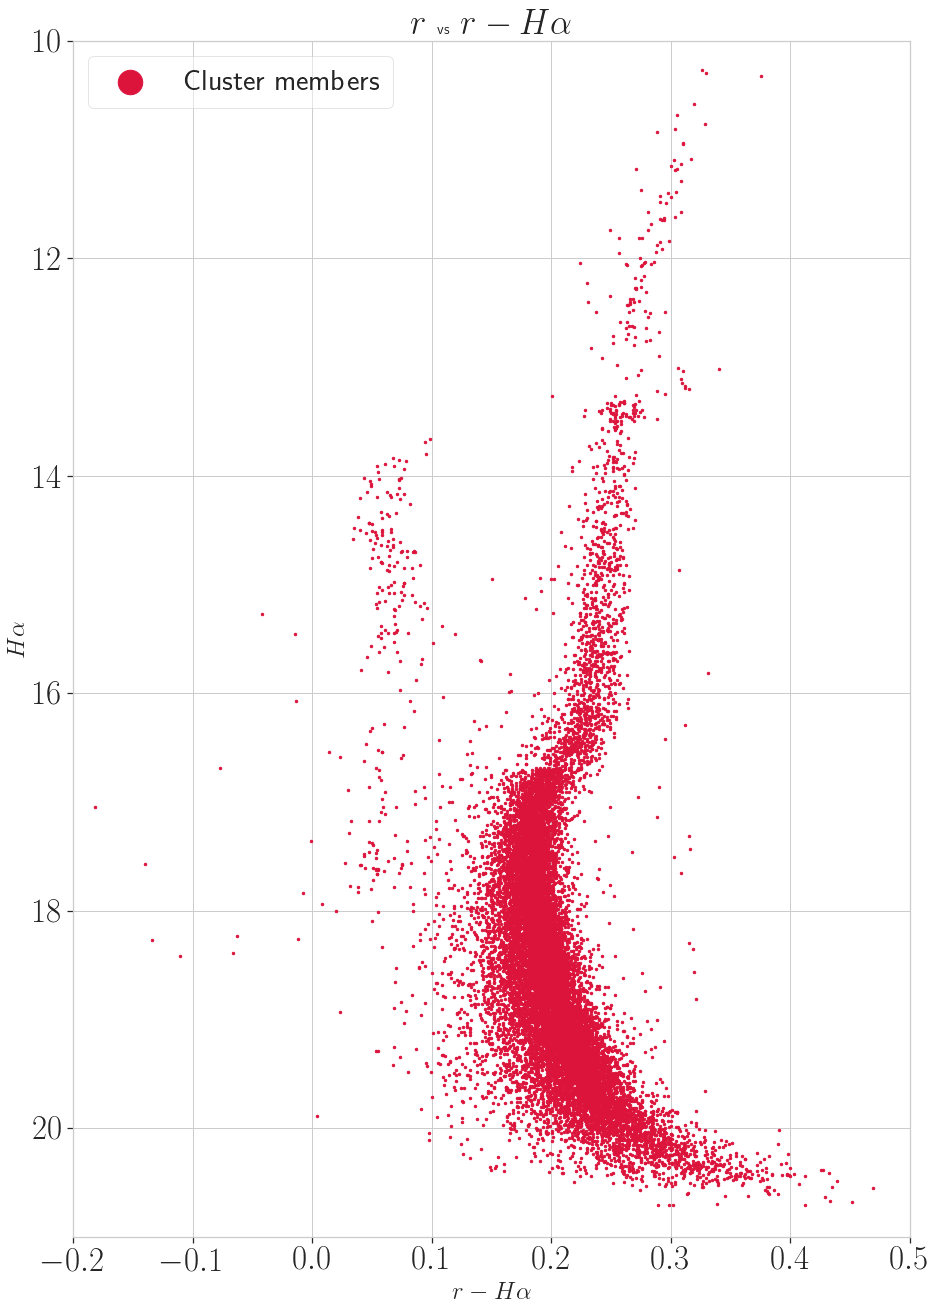

In [16]:
plot_cmd("r", "r-Ha", 10, 21, -0.2, 0.5, "crimson")

In [21]:
def sub_cmd(ax, mag, color, u=10, d=21, l=-4, r=4, c="teal", ylabel=False, combine=False, mag_limit=16):
    
    ax = ax
    mag = mag
    a, b = color.split("-")[0], color.split("-")[1]
    
    
    if combine:
        
        adf = df[df[mag]<mag_limit]
        ax.scatter(adf[a] - adf[b], adf[mag], s=2, c=c, label=f"Cluster members in 2MASS")
        
    else:
        ax.scatter(odf[a] -odf[b], odf[mag], s=3, c="lightslategrey", label="Field Stars")
        ax.scatter(df[a] -df[b], df[mag], s=6, c=c, label="Cluster members")
    
    
    col = fr'${a}-{b}$ [mag]'
    
    if combine:
        col = fr'${a}-K$ (2MASS+VHS) [mag]'
        
    
    ax.set_ylim(d,u)
    ax.set_xlim(l,r)

    ax.set_xlabel(col, fontdict={"fontsize":30, "weight":"bold"})
    
    
    if ylabel:
        ax.set_ylabel(fr'${mag}$ [mag]', {"fontsize":35, "weight":"bold"})
    

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', length=5)
    
    ax.legend(markerscale=10, fontsize=25, loc=2, fancybox=True, framealpha=0.5)
    
    
    ax.set_title(fr"${mag}$ " + r"{\fontsize{25pt}{3em}\selectfont{}{vs}} "  + col[:-6], {"fontsize":40, "weight":"bold"}, pad=12)
    
    return

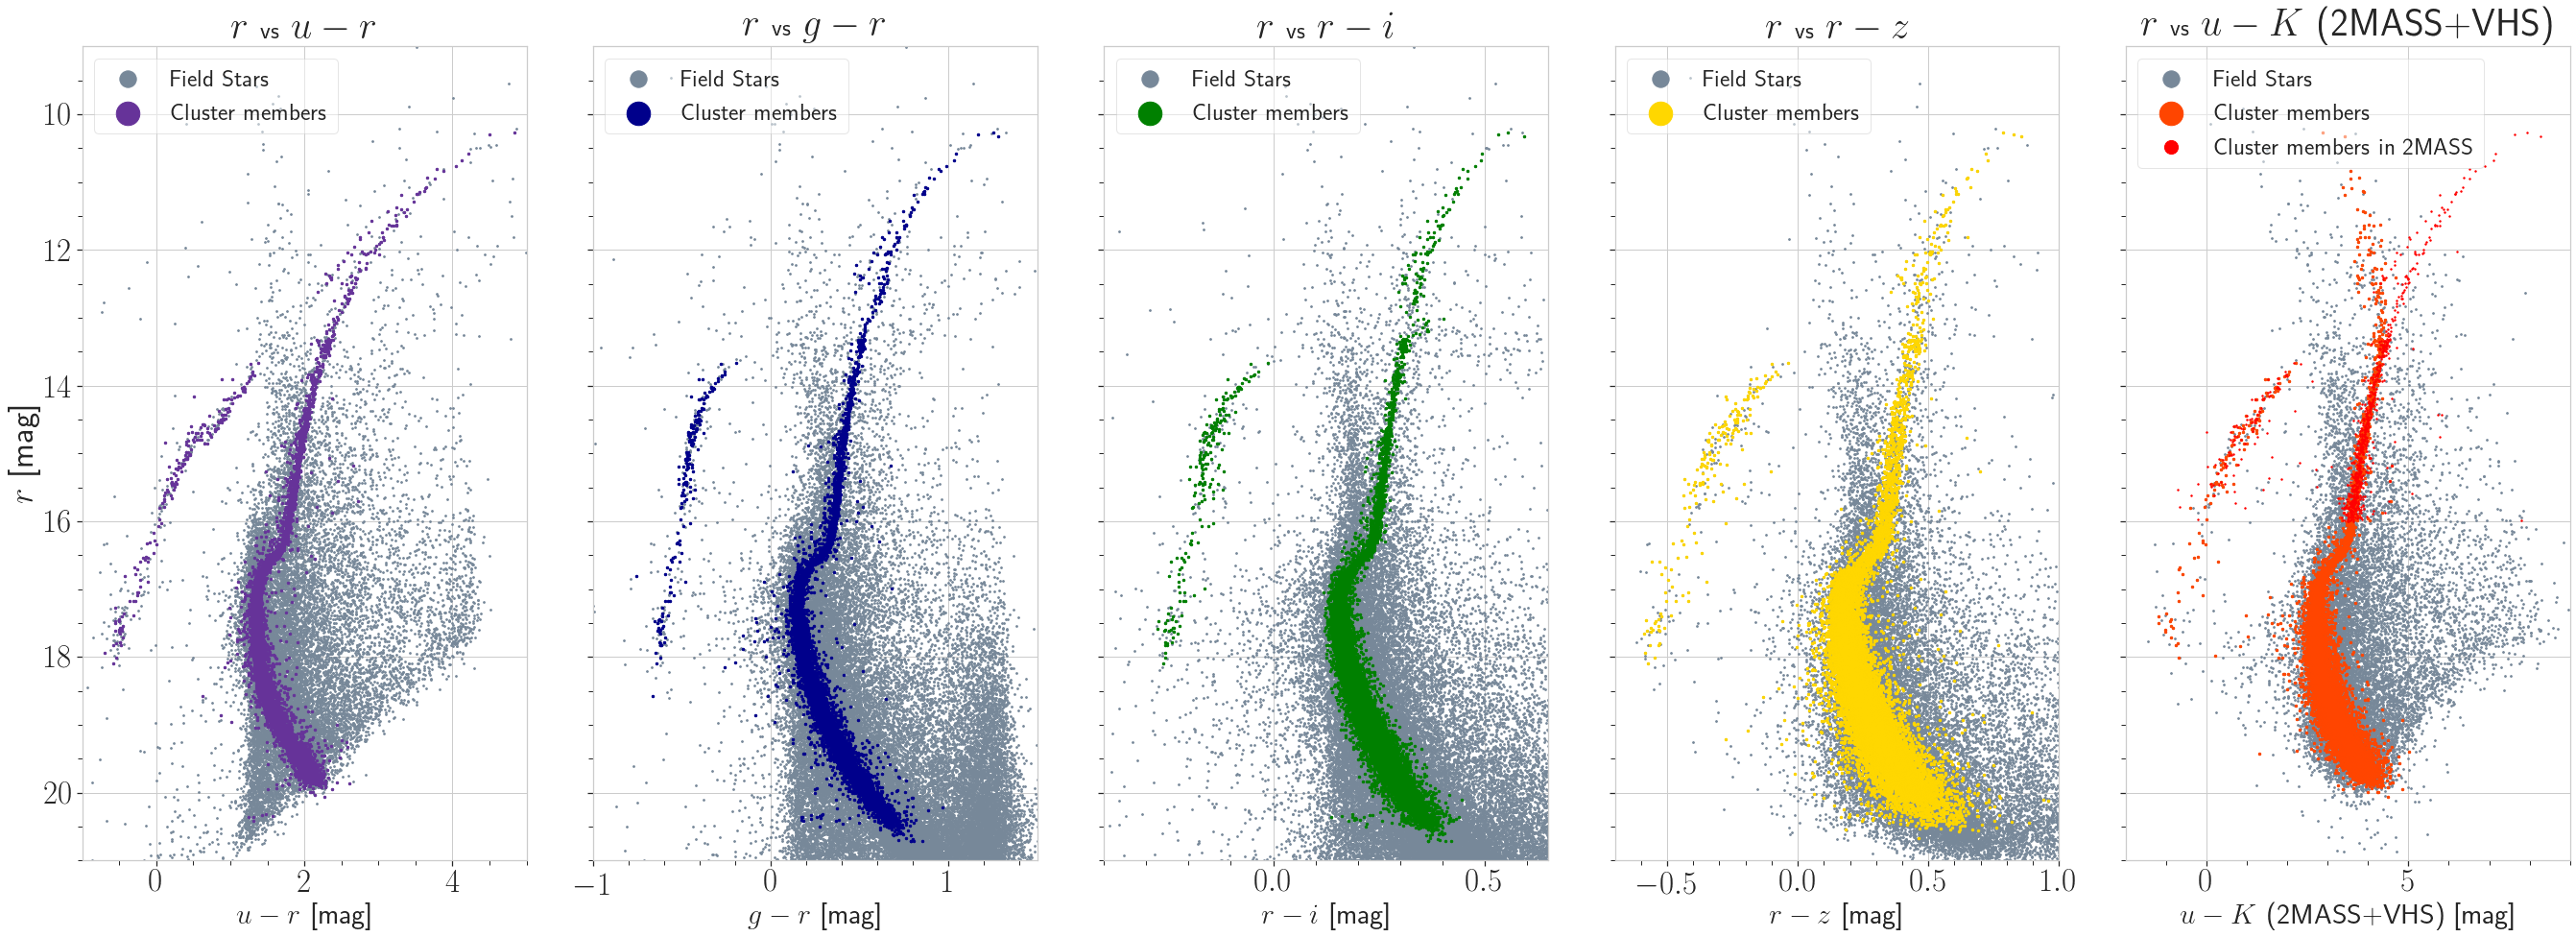

In [23]:
fig, ax =  plt.subplots(1, 5, figsize=(40,15), sharey=True)

plt.rc('text', usetex=True)

fig.subplots_adjust(wspace=0.15, top = 0.91 ,left=0.05, right=0.95,)

ax = ax.ravel()

sub_cmd(ax[0], "r", "u-r", 9, 21, -1, 5, "rebeccapurple", ylabel=True)
#"""
sub_cmd(ax[1], "r", "g-r", 9, 22, -1, 1.5, "darkblue")

sub_cmd(ax[2], "r", "r-i", 9, 20, -0.4, 0.65, "green")

sub_cmd(ax[3], "r", "r-z", 9, 21, -0.7, 1., "gold")

sub_cmd(ax[4], "r", "u-Ks", 9, 21, -2, 9, "orangered")

sub_cmd(ax[4], "r", "u-K2", 9, 21, -2, 9, "red", combine=True)


#"""


#fig.suptitle(r"Color Magnitude Diagrams", fontsize= 40, weight="heavy" )

fig.savefig("CMDs_N6752.tiff", dpi=600)

plt.show()
plt.close()